# NOAA GridSat-B1 Data

Here we are trying to develop a few tools for the [NOAA GridSat-B1 CDR Data](https://www.ncdc.noaa.gov/gridsat/gridsat-index.php?name=gridsat-intro). According to the official [data description](https://www.ncdc.noaa.gov/gridsat/gridsat-index.php?name=variables), the main variable is stored in `netCDF4.Dataset.variables.irwin_cdr`.

Primary variables (irwin_cdr, irwvp, vschn) are always stored as 2-dimensional variables.

Some sample data locates in the directory `/data/noaa/`.

In [1]:
import numpy as np
import pandas as pd
import netCDF4 as nc

ncfile = '../../data/noaa/GRIDSAT-B1.2014.01.01.00.v02r01.nc'
data = nc.Dataset(ncfile)

print(data)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: GridSat-B1 - Gridded Satellite (GridSat) ISCCP B1 Observations
    summary: Geostationary data are remapped to equal angle projection to facilitate processing and inter-calibrated using HIRS to ensure climate quality.
    Conventions: CF-1.6
    Metadata_Conventions: CF-1.6, Unidata Dataset Discovery v1.0, NOAA CDR v1.0
    references: http://dx.doi.org/10.1175/2011BAMS3039.1  http://dx.doi.org/10.1175/2007JTECHA910.1  http://dx.doi.org/10.1117/1.JRS.6.063523
    source: ISCCP.B1U.a.GOE-13.2013.12.31.2345.NOA.gz,ISCCP.B1U.a.MET-7.2013.12.31.2330.EUM.gz,ISCCP.B1U.a.MTS-2.2013.12.31.2331.JMA.gz,ISCCP.B1U.a.FY2-E.2014.01.01.0000.CMA.gz,ISCCP.B1U.a.GOE-15.2014.01.01.0000.NOA.gz,ISCCP.B1U.a.MSG-3.2014.01.01.0012.EUM.gz,b1u.calibration.correction.IRWIN.v17
    id: GRIDSAT-B1.2014.01.01.00.v02r01.nc
    naming_authority: gov.noaa.ncdc
    license: No constraints on data access or use.
    processi

In [2]:
print(data.dimensions)
print()
print(data.geospatial_lat_min)
print(data.geospatial_lat_max)
print(data.geospatial_lat_resolution)
print(data.geospatial_lon_min)
print(data.geospatial_lon_max)
print(data.geospatial_lon_resolution)
print()
print(data.variables.keys())

{'lon': <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 5143, 'lat': <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 2000, 'Ngeo': <class 'netCDF4._netCDF4.Dimension'>: name = 'Ngeo', size = 6, 'StrLen': <class 'netCDF4._netCDF4.Dimension'>: name = 'StrLen', size = 50, 'time': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 1, 'sparse2ir': <class 'netCDF4._netCDF4.Dimension'>: name = 'sparse2ir', size = 2, 'sparse3ir': <class 'netCDF4._netCDF4.Dimension'>: name = 'sparse3ir', size = 519058, 'sparse2wv': <class 'netCDF4._netCDF4.Dimension'>: name = 'sparse2wv', size = 2, 'sparse2vs': <class 'netCDF4._netCDF4.Dimension'>: name = 'sparse2vs', size = 521689}

-70.0
69.93001
0.07
-180.0
179.94
0.07

dict_keys(['lat', 'lon', 'time', 'satlat', 'satlon', 'satrad', 'satname', 'b1ufile', 'b1file', 'calslp_irwin', 'caloff_irwin', 'calslp_irwvp', 'caloff_irwvp', 'vis_rad_slope', 'vis_dc_slope', 'vis_dc_offset', 'irwin_cdr', 'irwin_2', 'irwin_3', 'irwvp

### Data Dimension

The data ranged from -70$^\circ$N to 69.93$^\circ$N, -180$^\circ$E to 179.94$^\circ$E, with 0.07$^\circ$ intervals. The data dimension is (1, 2000, 5143), and missing values is -31999. 

According to the official [how to](https://www.ncdc.noaa.gov/gridsat/gridsat-index.php?name=howto), the `variable(irwin_cdr)` contains `int16` with values:

```
Value = Integer * scale_factor + add_offset
```

where `scale_factor = 0.01` and `offset = 200` ([Earth Engine Data Catalog
](https://developers.google.com/earth-engine/datasets/catalog/NOAA_CDR_GRIDSAT-B1_V2#bands)).

In [3]:
# Retrieve main variables
cdr = np.array(data.variables['irwin_cdr'])
lons = np.array(data.variables['lon'])
lats = np.array(data.variables['lat'])
print(cdr.shape)

# Re-scale variables
OFFSET = 200
SCALE_FACTOR = 0.01
cdr = cdr*SCALE_FACTOR + OFFSET
print(np.histogram(cdr))

# Clean up
cdr[cdr<0] = 200
print(np.histogram(cdr))

(1, 2000, 5143)
(array([  45517,       0,       0,       0,       0,       0,    1707,
        507898, 6187246, 3543632], dtype=int64), array([-119.98999 ,  -75.257996,  -30.525995,   14.206003,   58.938   ,
        103.67    ,  148.402   ,  193.13399 ,  237.866   ,  282.598   ,
        327.33    ], dtype=float32))
(array([   7401,   89407,  136031,  520639, 1519052, 2217168, 2592542,
       3114864,   55538,   33358], dtype=int64), array([184.3    , 198.603  , 212.906  , 227.209  , 241.512  , 255.815  ,
       270.11798, 284.421  , 298.724  , 313.02698, 327.33   ],
      dtype=float32))


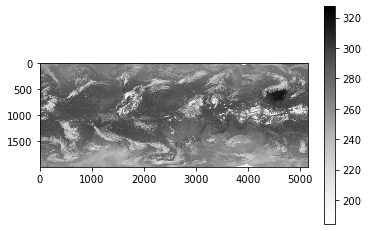

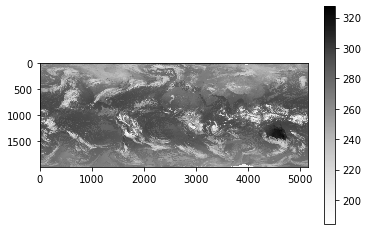

(array([   7401.,   89407.,  136031.,  520639., 1519052., 2217168.,
        2592542., 3114864.,   55538.,   33358.]),
 array([184.3    , 198.603  , 212.906  , 227.209  , 241.512  , 255.815  ,
        270.11798, 284.421  , 298.724  , 313.02698, 327.33   ],
       dtype=float32),
 <a list of 10 Patch objects>)

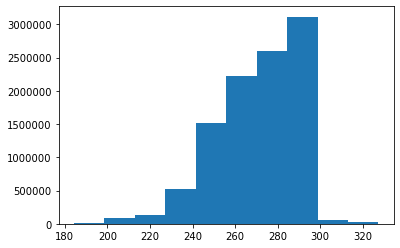

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
tmp = cdr[0,:,:]

plt.imshow(tmp, alpha=0.99, cmap='Greys')
plt.colorbar()
plt.show()

plt.imshow(np.flipud(tmp), alpha=0.99, cmap='Greys')
plt.colorbar()
plt.show()

plt.hist(cdr.flatten())

C:\Users\tsyo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


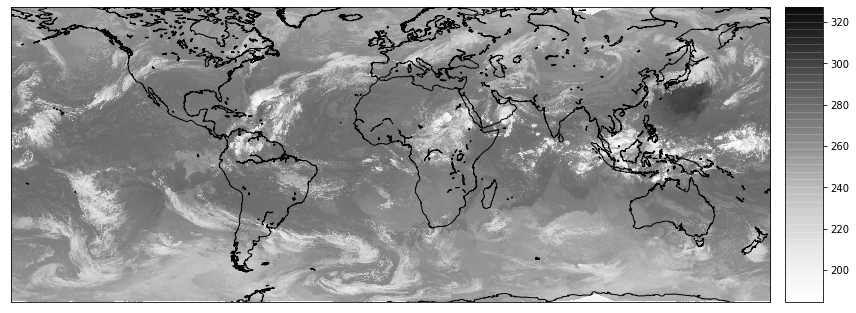

In [5]:
from mpl_toolkits.basemap import Basemap

lat0 = data.geospatial_lat_min
lat1 = data.geospatial_lat_max
lon0 = data.geospatial_lon_min
lon1 = data.geospatial_lon_max

plt.figure(figsize=(12,6))
m = Basemap(llcrnrlon=lon0, urcrnrlon=lon1, llcrnrlat=lat0, urcrnrlat=lat1, resolution='l')
m.drawcoastlines()
m.imshow(np.flipud(tmp), alpha=0.8, cmap='Greys')     # Draw a filled-contour plot with the interpolated grid data
cb = m.colorbar()                           # Show colorbar

plt.tight_layout()
plt.show()

C:\Users\tsyo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


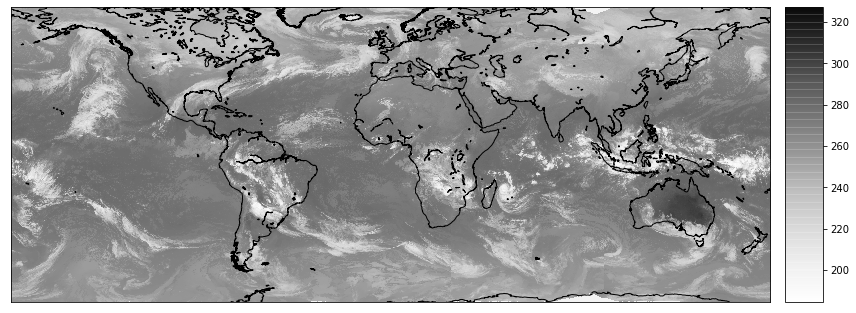

In [6]:
plt.figure(figsize=(12,6))
m = Basemap(llcrnrlon=lon0, urcrnrlon=lon1, llcrnrlat=lat0, urcrnrlat=lat1, resolution='l')
m.drawcoastlines()
m.imshow((tmp), alpha=0.8, cmap='Greys')     # Draw a filled-contour plot with the interpolated grid data
cb = m.colorbar()                           # Show colorbar

plt.tight_layout()
plt.show()

### Data Orientation: no flip on Y axis

Comparing to the EOSDIS Worldview by NASA ([2014-01-01-00z](https://worldview.earthdata.nasa.gov/?t=2014-01-01-T08%3A10%3A39Z)), we can see there should be a stoem east of Madagascar. So, the NOAA data is with normal map orientation and hence we don't need to flip up-down order.


## Domain of Analysis: East Asia

For further analysis, we will focus on the East Asia region, i.e., 0$^\circ$ ~ 60$^\circ$N, 100$^\circ$ ~ 160$^\circ$E.

### Calculate the index:
- 0-60'E
    -  (0+70)/0.07 = 999.99
    - (60+70)/0.07 = 1857.14
    - 999 ~ 1858
- 100-160'E
    - (100+180)/0.07 = 4000
    - (160+180)/0.07 = 4857.14
    - 4000 ~ 4858

In [25]:
print(lats[1000])
print(lats[1858])
print(lons[4000])
print(lons[4858])

ea_data = tmp[1000:1858, 4000:4858]
print(ea_data.shape)

0.0
60.059998
100.0
160.06
(858, 858)


C:\Users\tsyo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


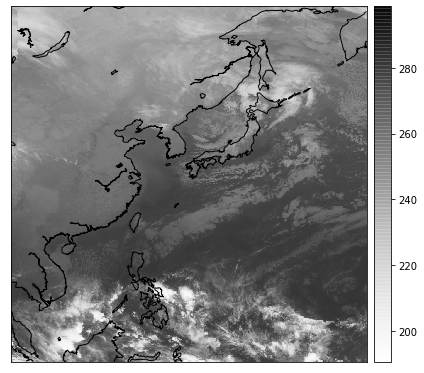

In [27]:
lat0 = lats[1000]
lat1 = lats[1858]
lon0 = lons[4000]
lon1 = lons[4858]

plt.figure(figsize=(6,6))
m = Basemap(llcrnrlon=lon0, urcrnrlon=lon1, llcrnrlat=lat0, urcrnrlat=lat1, resolution='l')
m.drawcoastlines()
m.imshow(ea_data, alpha=0.8, cmap='Greys')     # Draw a filled-contour plot with the interpolated grid data
cb = m.colorbar()                              # Show colorbar

plt.tight_layout()
plt.show()

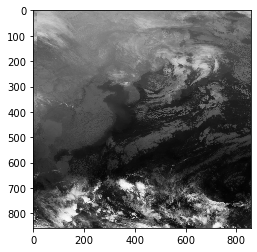

In [29]:
plt.imshow(np.flipud(ea_data), alpha=0.99, cmap='Greys')

## Animation

Here we try to make a animation with NOAA-GridSat-B1 data.

In [1]:
import numpy as np
import pandas as pd

# Utility functions
def list_noaagridsatb1_files(dir, suffix='.v02r01.nc', to_remove=['GRIDSAT-B1.','.v02r01.nc']):
    ''' To scan through the sapecified dir and get the corresponding file with suffix. '''
    import os
    import pandas as pd
    xfiles = []
    for root, dirs, files in os.walk(dir):  # Loop through the directory
        for fn in files:
            if fn.endswith(suffix):         # Filter files with suffix
                timestamp = fn
                for s in to_remove:         # Removing prefix and suffix to get time-stamp
                    timestamp = timestamp.replace(s,'')
                xfiles.append({'timestamp':timestamp, 'xuri':os.path.join(root, fn)})
    return(pd.DataFrame(xfiles).sort_values('timestamp').reset_index(drop=True))

# Binary reader
def read_noaagridsatb1(furi, var='irwin_cdr', scale=0.01, offset=200, remove_na=True, crop_east_asia=True):
    ''' The method reads in a NOAA-GridSta-B1 image in netCDF4 format (.nc file). 
        The brightness temperature data was stored in int16 as 'irwin_cdr', with 
        a scal factor of 0.01 and offset of 200. The missing values is flagged as -31999.
        More details of the data is described in https://developers.google.com/earth-engine/datasets/catalog/NOAA_CDR_GRIDSAT-B1_V2.
        Since our analysis focuss on East Asia (0-60'N, 100-160'E), we used an 
        option to crop the data to this region (index: lat:1000~1858, lon:4000~4858).
        The output is a 2-d numpy array of float32 with shape (858, 858).
    '''
    import numpy as np
    import netCDF4 as nc
    # Read in data
    data = nc.Dataset(furi)
    cdr = np.array(data.variables['irwin_cdr'])*scale+offset
    # Remove missing value
    if remove_na:
        cdr[cdr<0] = offset
    # Crop domain to East-Asia (0-60'N, 100-160'E)
    if crop_east_asia:
        return(cdr[0, 1000:1858, 4000:4858])
    else:
        return(cdr[0,:,:])

def read_multiple_noaagridsatb1(flist):
    ''' This method reads in a list of NOAA-GridSat-B1 images and returns a numpy array. '''
    import numpy as np
    data = []
    for f in flist:
        data.append(read_noaagridsatb1(f))
    return(np.array(data))



In [2]:
files = list_noaagridsatb1_files('../../data/noaa/')
print(files.head())

       timestamp                                               xuri
0  2014.01.01.00  ../../data/noaa/GRIDSAT-B1.2014.01.01.00.v02r0...
1  2014.01.01.03  ../../data/noaa/GRIDSAT-B1.2014.01.01.03.v02r0...
2  2014.01.01.06  ../../data/noaa/GRIDSAT-B1.2014.01.01.06.v02r0...
3  2014.01.01.09  ../../data/noaa/GRIDSAT-B1.2014.01.01.09.v02r0...
4  2014.01.01.12  ../../data/noaa/GRIDSAT-B1.2014.01.01.12.v02r0...


C:\Users\tsyo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


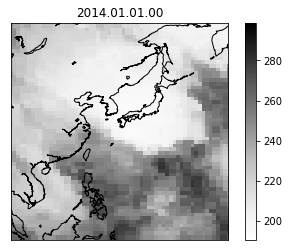

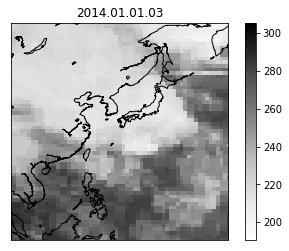

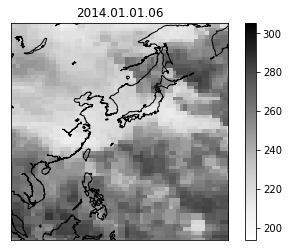

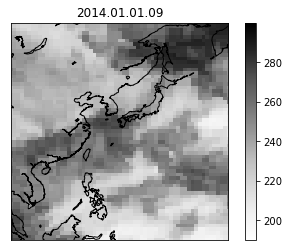

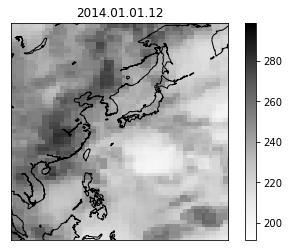

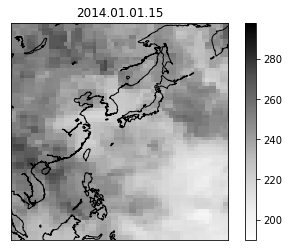

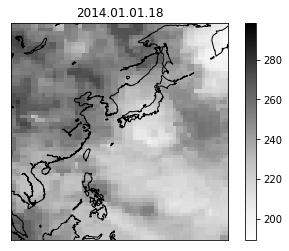

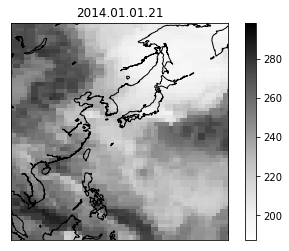

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.basemap import Basemap

lat0 = 0.0
lat1 = 60.059998
lon0 = 100.0
lon1 = 160.06

# Create new Figure and an Axes which fills it.
for i in range(len(files)):
    #plt.figure(figsize=(3, 3))
    m = Basemap(llcrnrlon=lon0, urcrnrlon=lon1, llcrnrlat=lat0, urcrnrlat=lat1, resolution='l')
    m.drawcoastlines()
    data = read_noaagridsatb1(files['xuri'].iloc[i])
    plt.imshow(data, alpha=0.99, cmap='Greys')
    plt.colorbar()
    plt.title(files['timestamp'].iloc[i])
    plt.show()